In [1]:
# 데이터 분석
import pandas as pd
import numpy as np
import random as rnd

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 기계 학습
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
# 데이터 로딩 (자전거 대여 예측 데이터)
# datatime 속성의 경우 날짜로 해석하기 위해 parse.dates 옵션으로 넣어줌
train = pd.read_csv('./train.csv',parse_dates=["datetime"])
test = pd.read_csv('./test.csv', parse_dates=["datetime"])
combine = [train, test]

In [3]:
print(train.columns.values)

['datetime' 'season' 'holiday' 'workingday' 'weather' 'temp' 'atemp'
 'humidity' 'windspeed' 'casual' 'registered' 'count']


In [4]:
# preview the data
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):


In [6]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Missing Value 처리

In [7]:
# check missing values in train dataset
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

누락된 값이 없으므로 따로 누락값을 채워주거나 속성을 제거할 필요가 없다.

# 데이터 전처리 : 속성 분리

In [9]:
# train 데이터의 datetime이 샘플별로 다르기 때문에 'datetime' 속성을 분리하여 새로운 속성 생성
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek

In [10]:
# 속성이 잘 분리되었는지 확인
train[["datetime","year","month","day","hour","minute","second","dayofweek"]].head()

,datetime,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [11]:
# test 데이터도 동일하게 "datetime"에 대해 새로운 속성을 생성한다
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = train["datetime"].dt.dayofweek

In [12]:
# 속성이 잘 분리되었는지 확인
test[["datetime","year","month","day","hour","minute","second","dayofweek"]].head()

,datetime,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,5
1,2011-01-20 01:00:00,2011,1,20,1,0,0,5
2,2011-01-20 02:00:00,2011,1,20,2,0,0,5
3,2011-01-20 03:00:00,2011,1,20,3,0,0,5
4,2011-01-20 04:00:00,2011,1,20,4,0,0,5


# 데이터 시각화

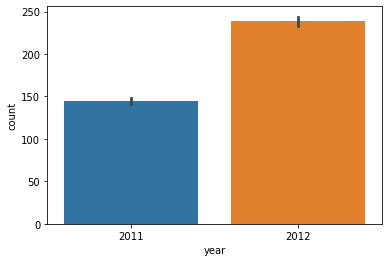

In [13]:
# 연도별 대여량 확인
sns.barplot(data = train, x = 'year', y = 'count')

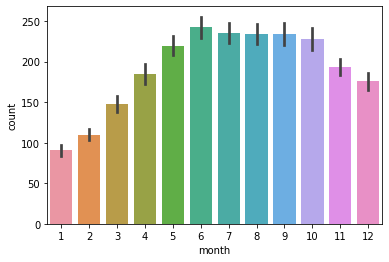

In [14]:
# 월별 대여량 확인
sns.barplot(data = train, x = 'month', y = 'count')

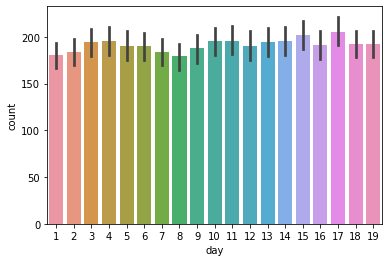

In [15]:
# 일별 대여량 확인
sns.barplot(data = train, x = 'day', y = 'count')

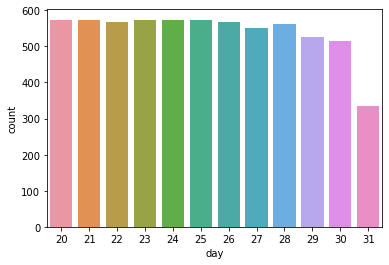

In [16]:
# 일별 대여량을 그래프로 시각화한 결과, 1~19일 데이터만 존재한다는 것을 알 수 있다.
# test 데이터도 동일하게 존재하는지 확인해본다.
test["day"] = test["datetime"].dt.day
sns.countplot(data = test, x = 'day')

In [17]:
# 확인 결과, 일 데이터가 train과 test를 나누는 변수로 보인다.
# 따라서, 이는 머신 러닝 활용에 적합하지 않은 속성으로 판단

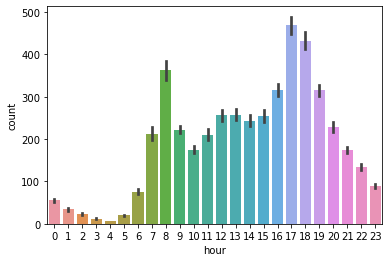

In [18]:
# 시간별 대여량 확인
sns.barplot(data = train, x = 'hour', y = 'count')

In [19]:
# 출퇴근(혹은 등하교) 시간대에 자전거 대여량이 비교적 많은 것을 알 수 있다.

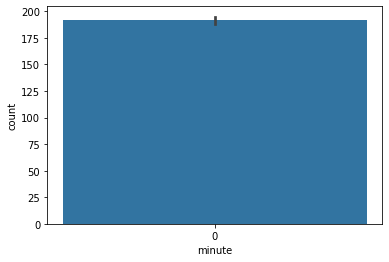

In [20]:
# 분별 대여량 확인
sns.barplot(data = train, x = 'minute', y = 'count')

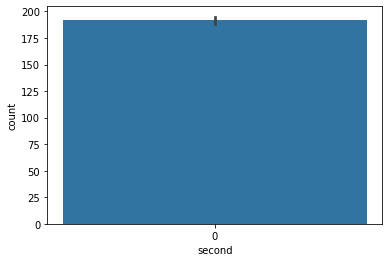

In [21]:
# 초별 대여량 확인
sns.barplot(data = train, x = 'second', y = 'count')

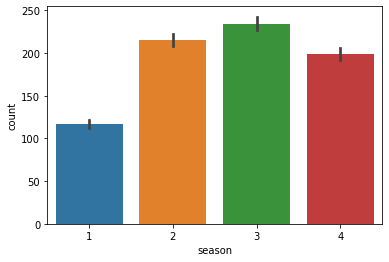

In [22]:
# 계절별 대여량 확인
sns.barplot(data = train, x = 'season', y = 'count')

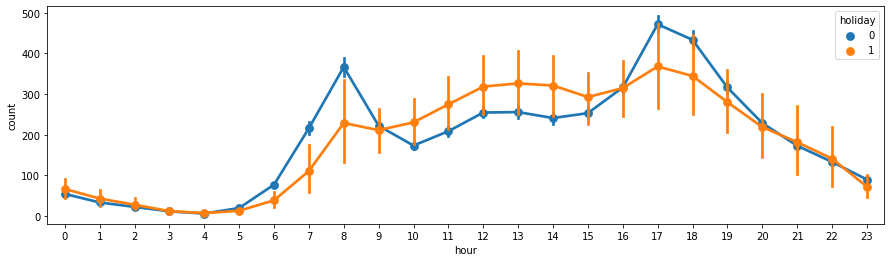

In [23]:
# holiday 카테고리에 따른 시간별 대여량
plt.figure(figsize = (15, 4))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'holiday')

In [24]:
# 휴일이 아닌 경우 출퇴근 시간대에 자전거 대여량이 더 많음을 알 수 있다.
# 그러나 그래프를 보았을 때, 휴일인 날의 점에 막대가 많은 것을 보아 휴일인 날의 데이터가 부족한 것으로 확인된다.

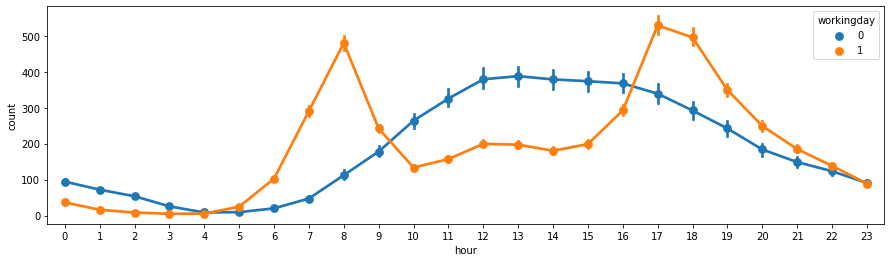

In [25]:
# workingday 카테고리에 따른 시간별 대여량
plt.figure(figsize = (15, 4))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday')

In [26]:
# 근무일인 경우 휴일이 아닌 경우와 마찬가지로 출퇴근 시간대에 자전거 대여량이 많음을 알 수 있다.
# 데이터가 불균형한 holiday 속성을 대신하여 workingday 속성을 사용하는 것이 나아보인다.

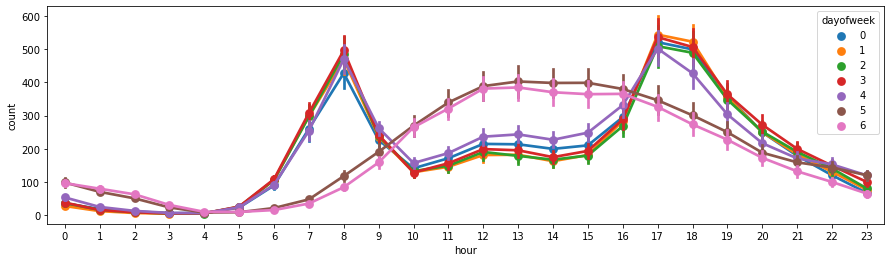

In [27]:
# 요일에 따른 시간별 대여량
plt.figure(figsize = (15, 4))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek')

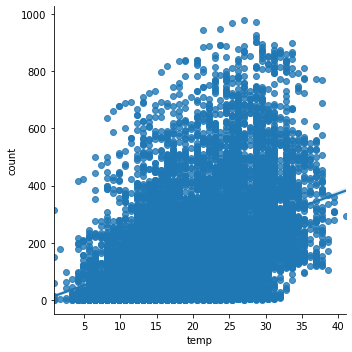

In [28]:
# temp별 대여량 확인
# 앞선 데이터들과 달리 연속형 data로서 속성값들이 제각각이기때문에 분포를 파악하기로 한다.
sns.lmplot(data = train, x = 'temp', y = 'count')

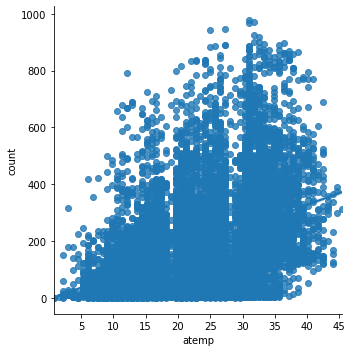

In [29]:
# atemp별 대여량 확인
sns.lmplot(data = train, x = 'atemp', y = 'count')

In [30]:
# lmplot 확인 시 temp와 atemp가 비슷한 형태를 띄는 것을 알 수 있다.
# 실제 두 변수의 상관관계를 확인해본다.
corr = train.corr()
corr['temp']

season        0.258689
holiday       0.000295
workingday    0.029966
weather      -0.055035
temp          1.000000
atemp         0.984948
humidity     -0.064949
windspeed    -0.017852
casual        0.467097
registered    0.318571
count         0.394454
year          0.061226
month         0.257589
day           0.015551
hour          0.145430
minute             NaN
second             NaN
dayofweek    -0.038466
Name: temp, dtype: float64

In [31]:
# 확인 결과 두 변수 간 상관관계가 굉장히 높은 것으로 확인된다.

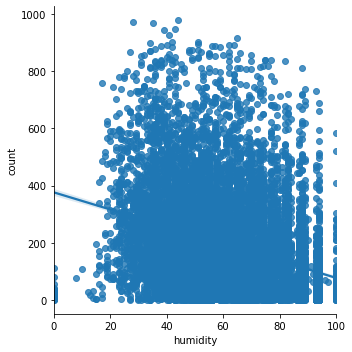

In [32]:
# huminity별 대여량 확인
sns.lmplot(data = train, x = 'humidity', y = 'count')

In [33]:
# 선형선이 음의 방향인 것으로 보아 습도가 낮을수록 대여량이 많은 것을 알 수 있다.

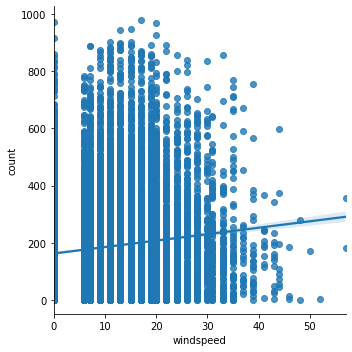

In [34]:
# windspeed별 대여량 확인
sns.lmplot(data = train, x = 'windspeed', y = 'count')

In [35]:
# 선형선이 양의 방향인 것으로 보아 풍속이 강할수록 대여량이 많은 것으로 보이나 풍속이 높은 경우의 데이터가 적어 정확한 판단은 어려워 보인다.

# 데이터 전처리 : 속성 조정

In [36]:
# 우선 현재 보유하고 있는 속성을 다시 한 번 확인
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6,0,0,5
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,0,0,5
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8,0,0,5
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9,0,0,5


###### 속성 조정
1. 일 데이터가 train과 test를 나누는 변수로 보이기 때문에 day 제거
2. minute, second는 데이터가 0뿐이므로 제거
3. holiday 의 경우 데이터량이 불균형하므로 제거
4. temp와 atemp가 서로 높은 상관관계를 띄므로 둘 중 하나 제거
5. label을 count로 할 것이므로 casual, registered (비회원, 회원 별 대여량)은 제거
6. 나머지 속성들은 그대로 채택

### 데이터 전처리 : 속성 조정 - 필요없는 속성 제거

In [37]:
train.drop('datetime', axis=1, inplace=True)
train.drop('day', axis=1, inplace=True)
train.drop('minute', axis=1, inplace=True)
train.drop('second', axis=1, inplace=True)
train.drop('holiday', axis=1, inplace=True)
train.drop('casual', axis=1, inplace=True)
train.drop('registered', axis=1, inplace=True)

In [38]:
test.drop('day', axis=1, inplace=True)
test.drop('minute', axis=1, inplace=True)
test.drop('second', axis=1, inplace=True)
test.drop('holiday', axis=1, inplace=True)

### 데이터 전처리 : 속성 조정 - temp, atemp 확인 및 제거

In [39]:
# count와의 상관계수를 확인하여 둘 중 상관관계가 높은 속성 찾기
corr['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
year          0.260403
month         0.166862
day           0.019826
hour          0.400601
minute             NaN
second             NaN
dayofweek    -0.002283
Name: count, dtype: float64

In [40]:
# temp와 count 간 상관계수가 더 높으므로 atemp는 제거
train.drop('atemp', axis=1, inplace=True)
test.drop('atemp', axis=1, inplace=True)

### 데이터 전처리 : 속성 조정 - count 분포 확인 및 조정

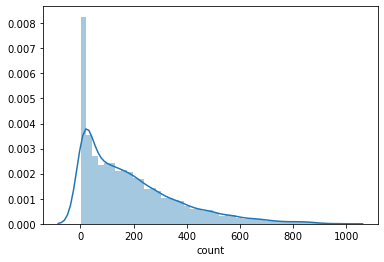

In [41]:
sns.distplot(train['count'])

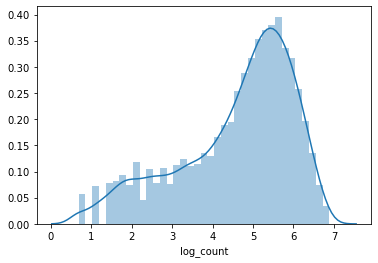

In [42]:
# 데이터의 분포가 왼쪽으로 치우쳐 있는 것을 확인할 수 있다.
# 따라서 Log Transformation을 이용하여 정규 분포를 적용한다.
train['log_count'] = np.log(train['count']+1)
sns.distplot(train['log_count'])

In [43]:
train.head()

,season,workingday,weather,temp,humidity,windspeed,count,year,month,hour,dayofweek,log_count
0,1,0,1,9.84,81,0.0,16,2011,1,0,5,2.833213
1,1,0,1,9.02,80,0.0,40,2011,1,1,5,3.713572
2,1,0,1,9.02,80,0.0,32,2011,1,2,5,3.496508
3,1,0,1,9.84,75,0.0,13,2011,1,3,5,2.639057
4,1,0,1,9.84,75,0.0,1,2011,1,4,5,0.693147


In [44]:
test.head()

,datetime,season,workingday,weather,temp,humidity,windspeed,year,month,hour,dayofweek
0,2011-01-20 00:00:00,1,1,1,10.66,56,26.0027,2011,1,0,5
1,2011-01-20 01:00:00,1,1,1,10.66,56,0.0000,2011,1,1,5
2,2011-01-20 02:00:00,1,1,1,10.66,56,0.0000,2011,1,2,5
3,2011-01-20 03:00:00,1,1,1,10.66,56,11.0014,2011,1,3,5
4,2011-01-20 04:00:00,1,1,1,10.66,56,11.0014,2011,1,4,5


# Machine Learning 기법을 활용한 자전거 대여량 예측

In [46]:
X_train = train.drop(["count","log_count"], axis=1)
Y_train = train["count"]
# Y_train = train["log_count"] 로 하려 했으나 머신 러닝 적용 시 알 수 없는 에러가 발생한다.
# 에러 - unknown label type : continuous
X_test = test.drop("datetime", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((10886, 10), (10886,), (6493, 10))

In [47]:
X_train.head()

,season,workingday,weather,temp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,1,9.84,81,0.0,2011,1,0,5
1,1,0,1,9.02,80,0.0,2011,1,1,5
2,1,0,1,9.02,80,0.0,2011,1,2,5
3,1,0,1,9.84,75,0.0,2011,1,3,5
4,1,0,1,9.84,75,0.0,2011,1,4,5


In [48]:
Y_train.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [49]:
X_test.head()

,season,workingday,weather,temp,humidity,windspeed,year,month,hour,dayofweek
0,1,1,1,10.66,56,26.0027,2011,1,0,5
1,1,1,1,10.66,56,0.0000,2011,1,1,5
2,1,1,1,10.66,56,0.0000,2011,1,2,5
3,1,1,1,10.66,56,11.0014,2011,1,3,5
4,1,1,1,10.66,56,11.0014,2011,1,4,5


## Decision tree

In [50]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_DT = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) *100, 2)
acc_decision_tree

99.94

## 최종 결과 저장

In [54]:
Y_pred = Y_pred_DT

submission = pd.DataFrame({
        "datetime": test["datetime"],
        "count": Y_pred
    })
submission.to_csv('./sampleSubmission.csv', index=False)